In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("whitegrid")

In [7]:
#read in the training dataset
rd_train = pd.read_csv("/Users/dominiquekemp/Documents/GitHub/'Will It Restaurant?'/train_data.csv")

In [8]:
rd_train.shape

(2451, 37)

In [9]:
#recall primary features for customer targets
features = ['type', 'category', 'site','phone', 'booking_appointment_link', 'range', 'latitude','longitude', 'postal_code', 'borough', 'working_hours_old_format', 'other_hours', 'range', 'photos_count', 'reviews_per_score_1', 'reviews_per_score_2']

## Exploratory Data Analysis: Phase 1

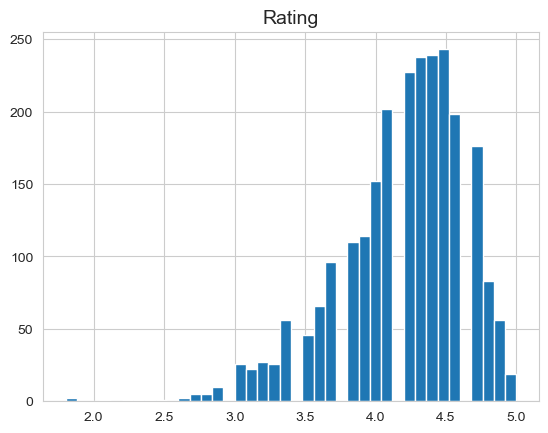

In [10]:
plt.hist(rd_train.rating, bins = 40)

plt.title('Rating', fontsize = 14)
plt.show()

The ratings distribution of Philly restaurants resembles a beta distribution, which is interesting. On the one hand, this could be viewed merely as evidence that the ratings between 4.3 and 4.6 carry the most representation individually. However, it is known that beta distributions arise naturally within the context of subjective logic, and the assignment of a Google star restaurant rating by a customer is a subjective process.

The resemblance also evokes the Pólya urn model, a statistical model emphasizing the "the rich get richer" property. This could manifest with aggregate restaurant ratings, where the presence of high ratings/reviews could stimulate new reviewers first to patronize the restaurant and then also leave a high rating. Yet this analysis pertains more to that of individual ratings at a single restaurant, in distinction to the above which plots the *average* ratings. However, the phenomenon that better fits here and could indeed apply is that of restaurants located near or comparing well in some other way to restaurants with high ratings receiving thereby a 'boost' that lifts their own average Google star rating.

## Categorical Analysis

Many of the features provided among the columns of rd_train are categorical. In this section, we look for the categorical distinctions that promote the most variance across category labels.

In [11]:
#compare borough variety to postal code variety
rd_train.borough.unique().shape, rd_train.postal_code.unique().shape

((54,), (64,))

### Price Range

In [12]:
ranges = list(rd_train.range.unique())

org_r = {x: rd_train[rd_train.range == x].rating for x in ranges}
reviews_by_range = pd.DataFrame(org_r)
reviews_by_range = reviews_by_range.rename(columns = {0: '0 signs', "$": '1 sign', "$$": '2 signs', '$$$': '3 signs', '$$$$': '4 signs'})
reviews_by_range

,2,1,3,0,2 stars,3 stars,4
0,4.3,NaN,NaN,NaN,NaN,NaN,NaN
1,4.4,NaN,NaN,NaN,NaN,NaN,NaN
2,4.7,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.9,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2446,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2447,4.6,NaN,NaN,NaN,NaN,NaN,NaN
2448,4.6,NaN,NaN,NaN,NaN,NaN,NaN
2449,4.7,NaN,NaN,NaN,NaN,NaN,NaN


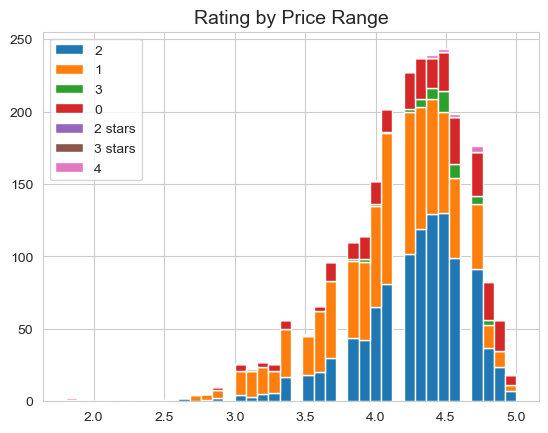

In [13]:
fig, ax = plt.subplots()
ranges = reviews_by_range.columns
ax.hist(reviews_by_range, bins = 40, stacked = True, label = ranges)

ax.legend()
ax.set_title('Rating by Price Range', fontsize = 14)
plt.show()

We see another interesting phenomenon: the overall average ratings distribution is mimicked by that of the price level 2 restaurants. This seems to suggest that the overall distribution is largely dominated by customer interaction with price level 2 restaurants, and interaction with all other restaurants should be interpreted as fluctuations away from that fundamental pattern.

### Provided Website/Phone Number

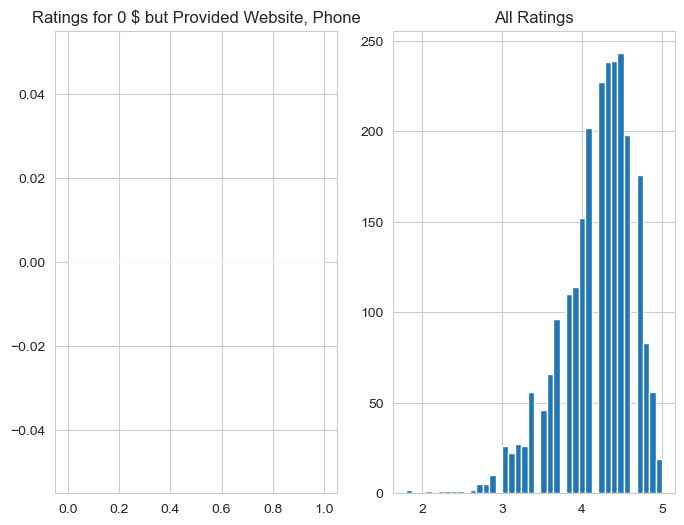

In [14]:
fig, axes = plt.subplots(1,2, figsize = (8,6))
axes[0].hist(rd_train[(rd_train.range == 0) & (rd_train.site == True) &(rd_train.phone == True)].rating, bins = 40)
axes[0].set_title('Ratings for 0 $ but Provided Website, Phone')

axes[1].hist(rd_train.rating, bins = 40)
axes[1].set_title('All Ratings')
plt.show()

Having a provided website and phone number seems to boost the avg. ratings of restaurants at price level 0 towards the "normal" trend.

### Borough

In [15]:
rd_train.borough.unique().shape

(54,)

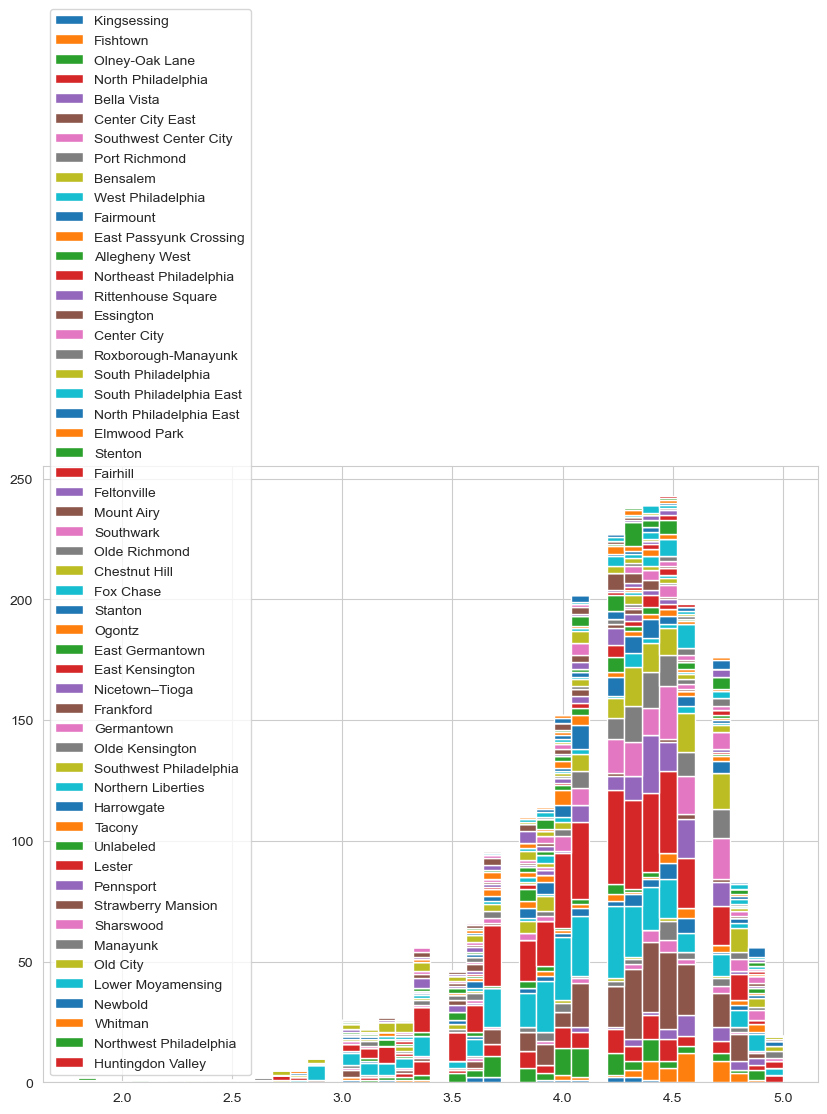

In [16]:
plt.figure(figsize= (10,8))

rating_by_borough = {x: rd_train[rd_train.borough == x].rating for x in rd_train.borough.unique()}
rating_by_borough = pd.DataFrame(rating_by_borough)
plt.hist(rating_by_borough, bins = 40, stacked = True, label = rd_train.borough.unique())
plt.legend()
plt.show()

## Comparison of Ratings, Reviews, and Photos Count/Summary Statistics

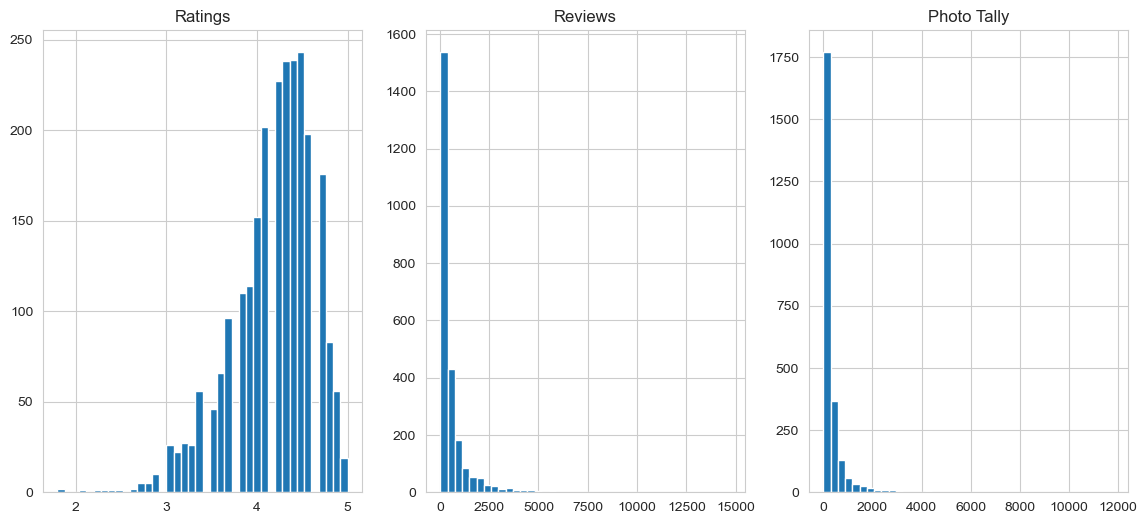

Number of restaurants is:  2451 . 'Reviews' bin size =  368.375 . 'Photo' bin size =  295.25


In [17]:
fig, axes = plt.subplots(1,3, figsize = (14,6))
axes[0].hist(rd_train.rating, bins = 40)
axes[0].set_title('Ratings')

axes[1].hist(rd_train.reviews, bins = 40)
axes[1].set_title('Reviews')

axes[2].hist(rd_train.photos_count, bins = 40)
axes[2].set_title('Photo Tally')
plt.show()
print("Number of restaurants is: ", len(rd_train), ". 'Reviews' bin size = ", 14735/40, ". 'Photo' bin size = ", 11810/40)

In [18]:
#Summary statistics for reviews and photos count
print(rd_train.reviews.describe(), "\n")
print(rd_train.photos_count.describe())

#note there is wider distribution as the scores increase

count     2451.000000
mean       578.931049
std        945.568182
min         30.000000
25%        123.000000
50%        287.000000
75%        626.000000
max      14735.000000
Name: reviews, dtype: float64 

count     2451.000000
mean       317.844553
std        642.671217
min          1.000000
25%         51.000000
50%        130.000000
75%        330.000000
max      11810.000000
Name: photos_count, dtype: float64


## Target-Feature Plots

In [19]:
fig = px.density_mapbox(rd_train, lat='latitude', lon='longitude', z='rating', radius=2, zoom=10,
                        mapbox_style="open-street-map")
fig.show()

Our speculations made after the ratings histogram plotting seem confirmed here, where we see that Center City and Rittenhouse Square, i.e. downtown Philly, have high concentrations of highly rated restaurants.

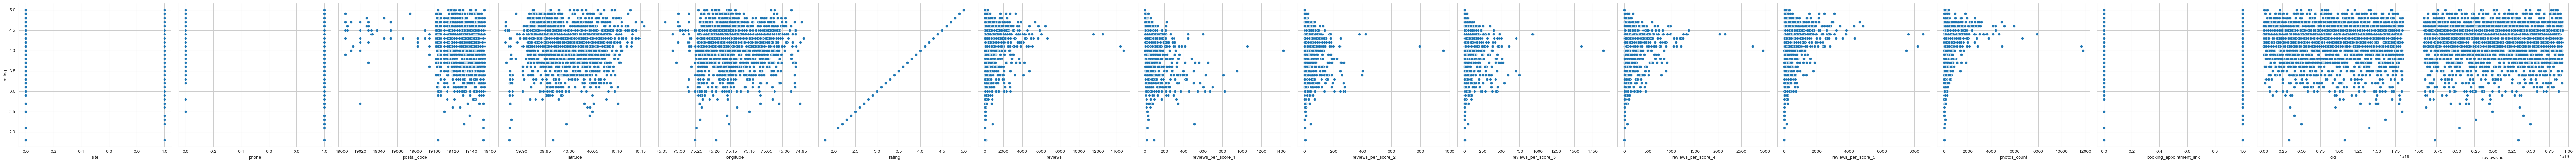

In [20]:
#plot Cartesian coordinates of 'rating' vs. each feature
sns.pairplot(rd_train,
                y_vars = ['rating'],
                x_vars = features.copy().remove("range"),
                height = 5,
                diag_kind = None)

plt.show()

## Consideration of Cuisine Types by Borough

In [22]:
#a function that filters a dataframe (with columns 'borough', 'type', 'category' ,'subtypes') according to inputs of type of cuisine and borough
def filtered_borough(dataf, cuis, bor):
    df = dataf[dataf.borough == bor].copy()
    df['contains cuis']= (df['type'].str.contains(cuis)) | (df['subtypes'].str.contains(cuis)) | (df['category'].str.contains(cuis))
    df = df[df['contains cuis']]
    del df['contains cuis']
    return df

In [23]:
rd_train.category.unique()

array(['restaurants', 'bars', 'New American restaurant', 'Bakery',
       'coffee shops', 'Entertainment agency', 'Shabu-shabu restaurant',
       'Southern restaurant (US)', 'cafes', 'Puerto Rican restaurant',
       'Cheesesteak restaurant', 'hotels', 'Soul food restaurant',
       'Cafeteria', 'Vegan restaurant', 'Pretzel store',
       'Ramen restaurant', 'Cooking class', 'Pizza delivery', 'Brewery',
       'Sushi restaurant', 'Bed & breakfast', 'Beer store',
       'Chinese takeaway', 'Pizza takeaway', 'Grocery store',
       'Donut shop', 'Gay bar', 'Bagel shop', 'Convenience store',
       'Tex-Mex restaurant',
       'Restaurante especializado em sanduíches cheesesteaks',
       'Ice cream shop', 'Deli', 'Southern Italian restaurant',
       'Afghan restaurant', 'Hookah bar', 'Fresh food market',
       'Hamburger restaurant', 'Sichuan restaurant', 'Poke bar',
       'Asian fusion restaurant', 'Catering equipment rental service',
       'Juice shop', 'Market', 'Food and drink',

When distinguishing cuisine types, there are three apparent options for each restaurant entry: its type, subtype, or category. It is not initially clear which one to prefer. The function above considers all three equally.

In [24]:
#test the function
filtered_borough(rd_train, 'Italian', 'South Philadelphia').rating

816     4.5
1193    4.8
1321    4.7
1622    4.8
2184    4.7
2317    4.5
2361    4.3
Name: rating, dtype: float64

In [25]:
boroughs = np.sort(rd_train.borough.unique())
boroughs


array(['Allegheny West', 'Bella Vista', 'Bensalem', 'Center City',
       'Center City East', 'Chestnut Hill', 'East Germantown',
       'East Kensington', 'East Passyunk Crossing', 'Elmwood Park',
       'Essington', 'Fairhill', 'Fairmount', 'Feltonville', 'Fishtown',
       'Fox Chase', 'Frankford', 'Germantown', 'Harrowgate',
       'Huntingdon Valley', 'Kingsessing', 'Lester', 'Lower Moyamensing',
       'Manayunk', 'Mount Airy', 'Newbold', 'Nicetown–Tioga',
       'North Philadelphia', 'North Philadelphia East',
       'Northeast Philadelphia', 'Northern Liberties',
       'Northwest Philadelphia', 'Ogontz', 'Old City', 'Olde Kensington',
       'Olde Richmond', 'Olney-Oak Lane', 'Pennsport', 'Port Richmond',
       'Rittenhouse Square', 'Roxborough-Manayunk', 'Sharswood',
       'South Philadelphia', 'South Philadelphia East', 'Southwark',
       'Southwest Center City', 'Southwest Philadelphia', 'Stanton',
       'Stenton', 'Strawberry Mansion', 'Tacony', 'Unlabeled',
       'We

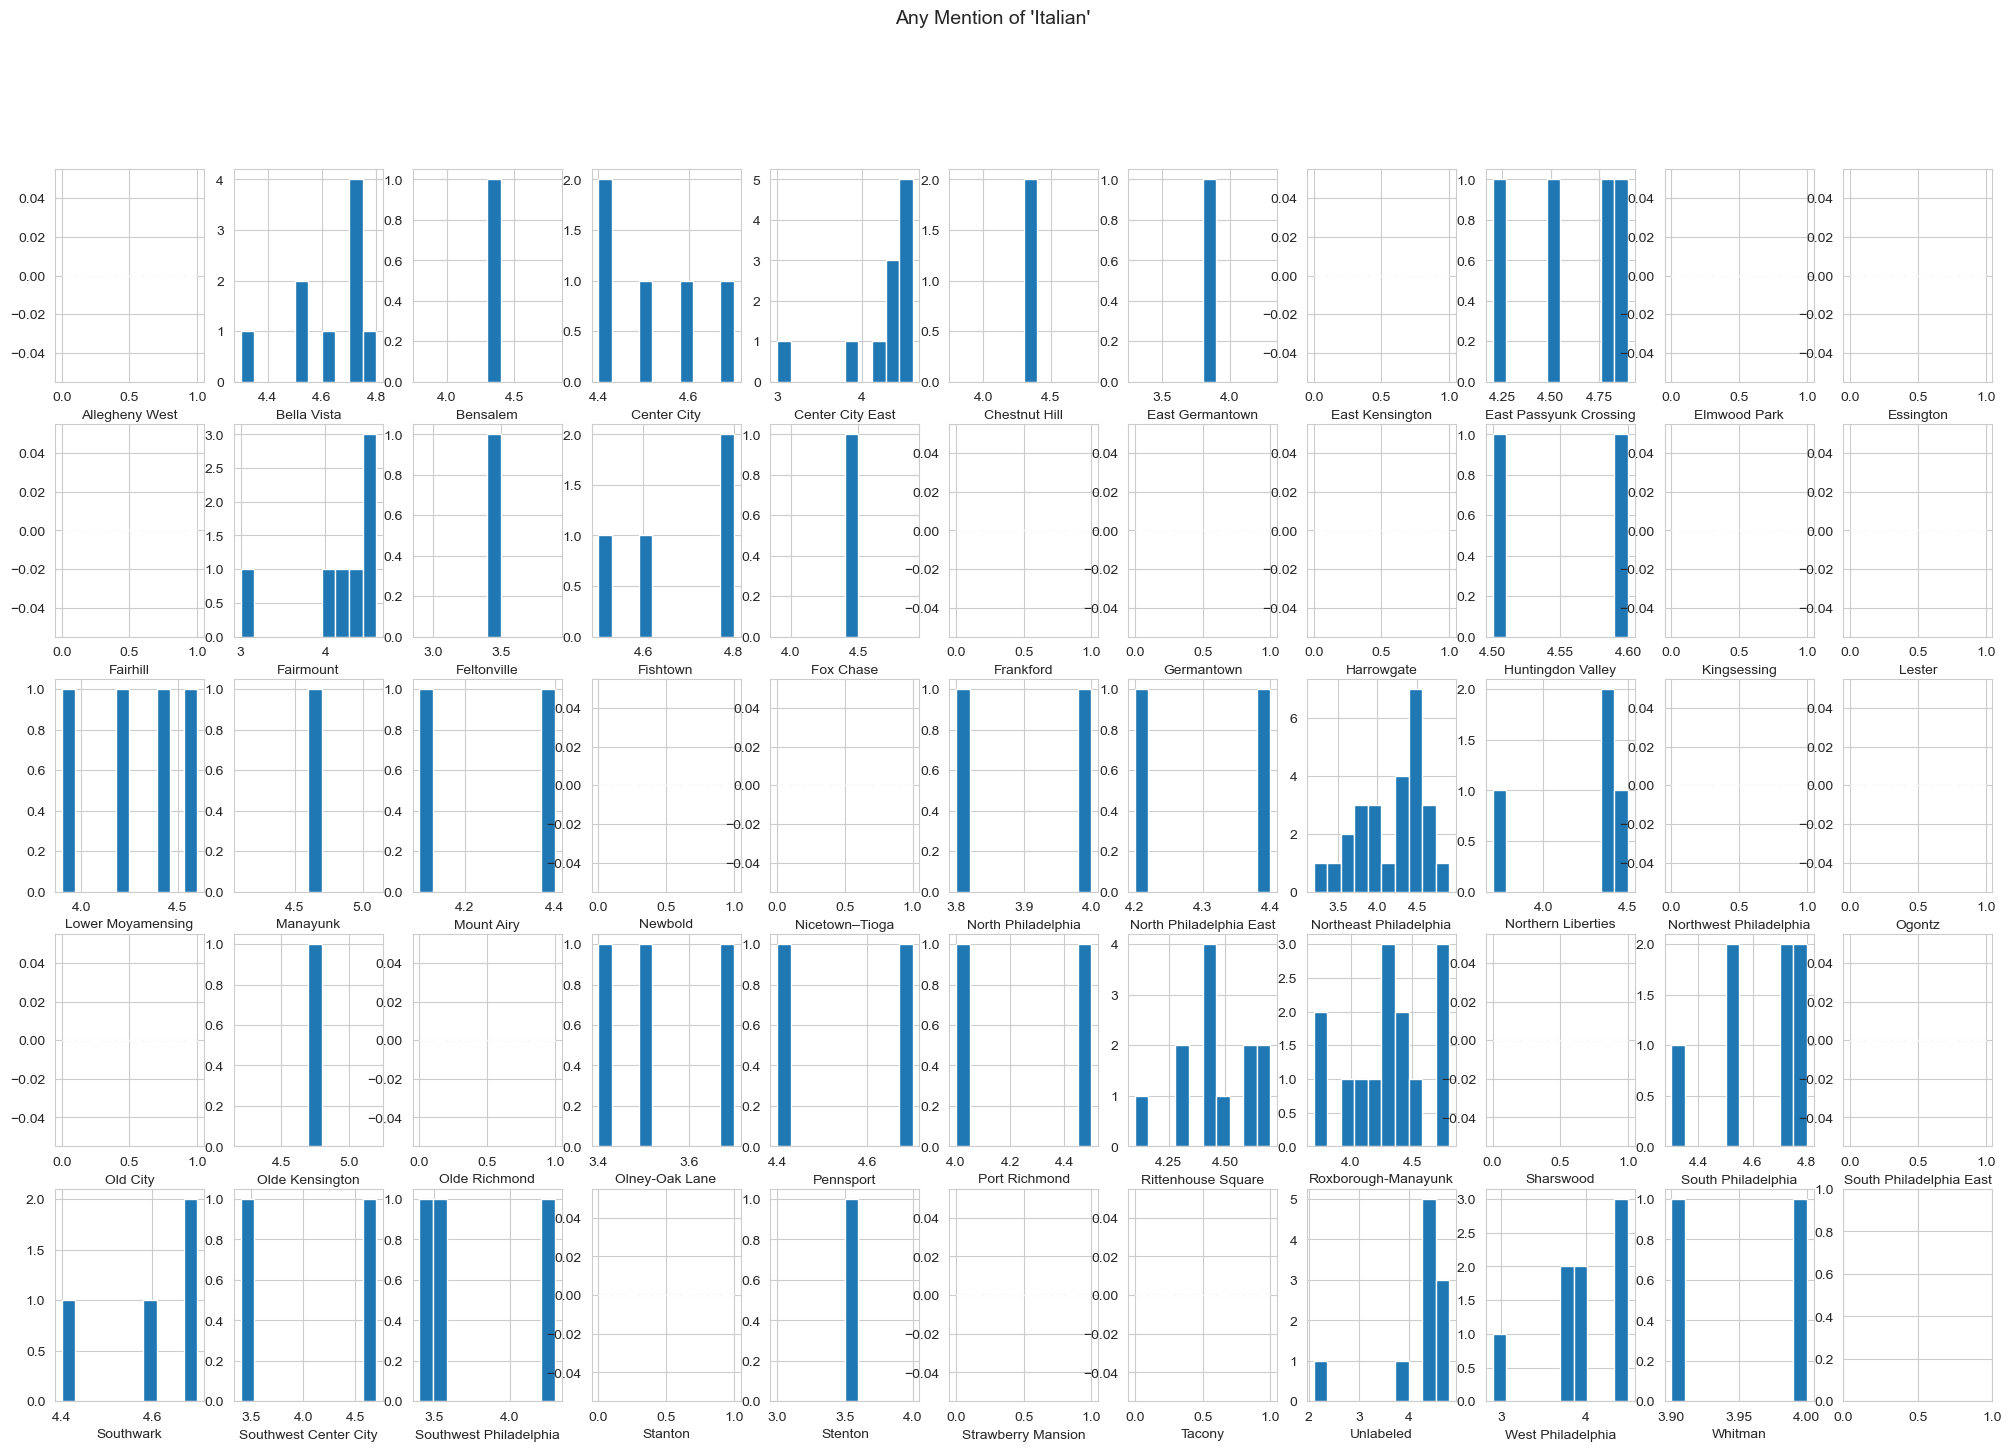

In [26]:
fig, ax = plt.subplots(5, 11, figsize = (25,16))
fig.suptitle("Any Mention of 'Italian'", fontsize = 14)
for i in range(54):
        q,r = divmod(i,11)
        borough = boroughs[i]
        ax[q,r].hist(filtered_borough(rd_train, 'Italian', borough).rating)
        ax[q,r].set_xlabel(borough)
plt.show()

Let us see whether it is better to go with type or category instead.

In [27]:
rd_train.category.unique()

array(['restaurants', 'bars', 'New American restaurant', 'Bakery',
       'coffee shops', 'Entertainment agency', 'Shabu-shabu restaurant',
       'Southern restaurant (US)', 'cafes', 'Puerto Rican restaurant',
       'Cheesesteak restaurant', 'hotels', 'Soul food restaurant',
       'Cafeteria', 'Vegan restaurant', 'Pretzel store',
       'Ramen restaurant', 'Cooking class', 'Pizza delivery', 'Brewery',
       'Sushi restaurant', 'Bed & breakfast', 'Beer store',
       'Chinese takeaway', 'Pizza takeaway', 'Grocery store',
       'Donut shop', 'Gay bar', 'Bagel shop', 'Convenience store',
       'Tex-Mex restaurant',
       'Restaurante especializado em sanduíches cheesesteaks',
       'Ice cream shop', 'Deli', 'Southern Italian restaurant',
       'Afghan restaurant', 'Hookah bar', 'Fresh food market',
       'Hamburger restaurant', 'Sichuan restaurant', 'Poke bar',
       'Asian fusion restaurant', 'Catering equipment rental service',
       'Juice shop', 'Market', 'Food and drink',

In [28]:
rd_train.type.unique()

array(['Seafood restaurant', 'Restaurant', 'Portuguese restaurant',
       'Pizza restaurant', 'Chinese restaurant', 'American restaurant',
       'Barbecue restaurant', 'Chicken restaurant', 'Indian restaurant',
       'New American restaurant', 'French restaurant', 'Bar & grill',
       'Indonesian restaurant', 'Kosher restaurant', 'Mexican restaurant',
       'Diner', 'Asian restaurant', 'Bakery', 'Coffee shop',
       'Chicken wings restaurant', 'Entertainment agency',
       'Jamaican restaurant', 'Sandwich shop', 'Shabu-shabu restaurant',
       'Brunch restaurant', 'Korean restaurant', 'Thai restaurant',
       'Caribbean restaurant', 'Latin American restaurant',
       'Fast food restaurant', 'Italian restaurant',
       'Breakfast restaurant', 'Creperie', 'Southern restaurant (US)',
       'Salvadoran restaurant', 'Cafe', 'Puerto Rican restaurant',
       'Vegetarian restaurant', 'Japanese restaurant',
       'Nepalese restaurant', 'Cheesesteak restaurant', 'Hotel',
       'So

In [29]:
#a function that filters a dataframe (with columns 'borough', 'type') according to inputs of type of cuisine and borough
def restric_borough(dataf, cuis, bor):
    df = dataf[dataf.borough == bor].copy()
    df['contains cuis']= (df['type'].str.contains(cuis)) 
    df = df[df['contains cuis']]
    del df['contains cuis']
    return df

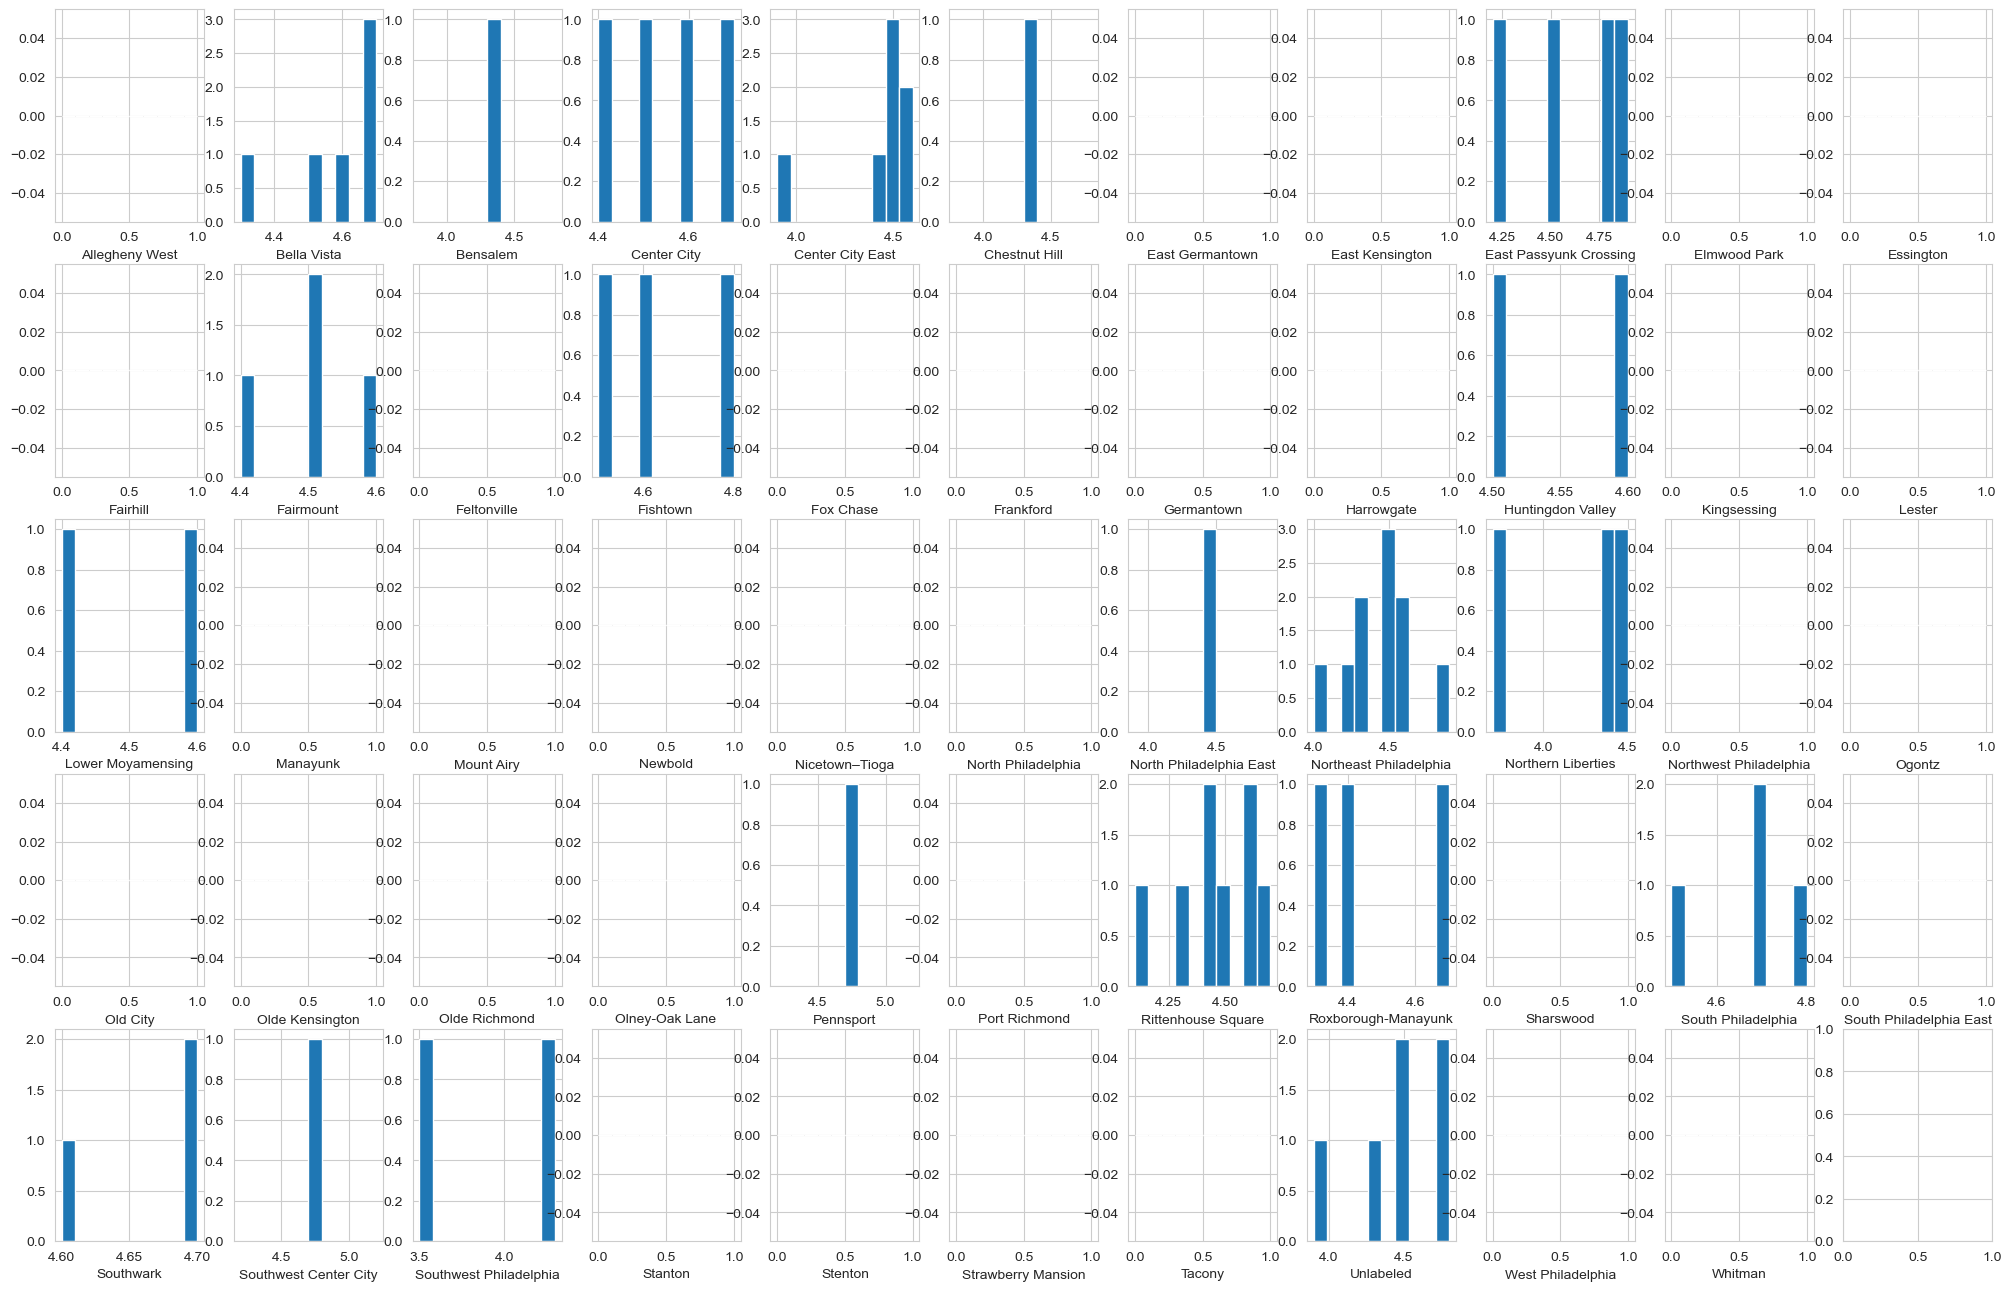

In [30]:
fig, ax = plt.subplots(5, 11, figsize = (25,16))

for i in range(54):
        marker = divmod(i,11)
        borough = boroughs[i]
        ax[marker].hist(restric_borough(rd_train, 'Italian', borough).rating)
        ax[marker].set_xlabel(borough)
plt.show()

We explore other cuisines beyond "Italian."

In [31]:
#make chart of cuisine density in south philly
rd_train[rd_train.borough == 'South Philadelphia'].type.value_counts(normalize = True)

type
Restaurant                  0.102362
Chinese restaurant          0.094488
Pizza restaurant            0.094488
Mexican restaurant          0.078740
Vietnamese restaurant       0.055118
Cheesesteak restaurant      0.055118
Breakfast restaurant        0.055118
Sandwich shop               0.047244
Fast food restaurant        0.039370
Italian restaurant          0.031496
Indonesian restaurant       0.023622
Diner                       0.023622
Jamaican restaurant         0.015748
Cambodian restaurant        0.015748
Brewery                     0.015748
Chicken restaurant          0.015748
Event venue                 0.015748
Coffee shop                 0.015748
Seafood restaurant          0.015748
Bar & grill                 0.015748
Indian restaurant           0.015748
American restaurant         0.015748
Deli                        0.015748
Pho restaurant              0.007874
Hamburger restaurant        0.007874
Venezuelan restaurant       0.007874
Mobile caterer              0.007

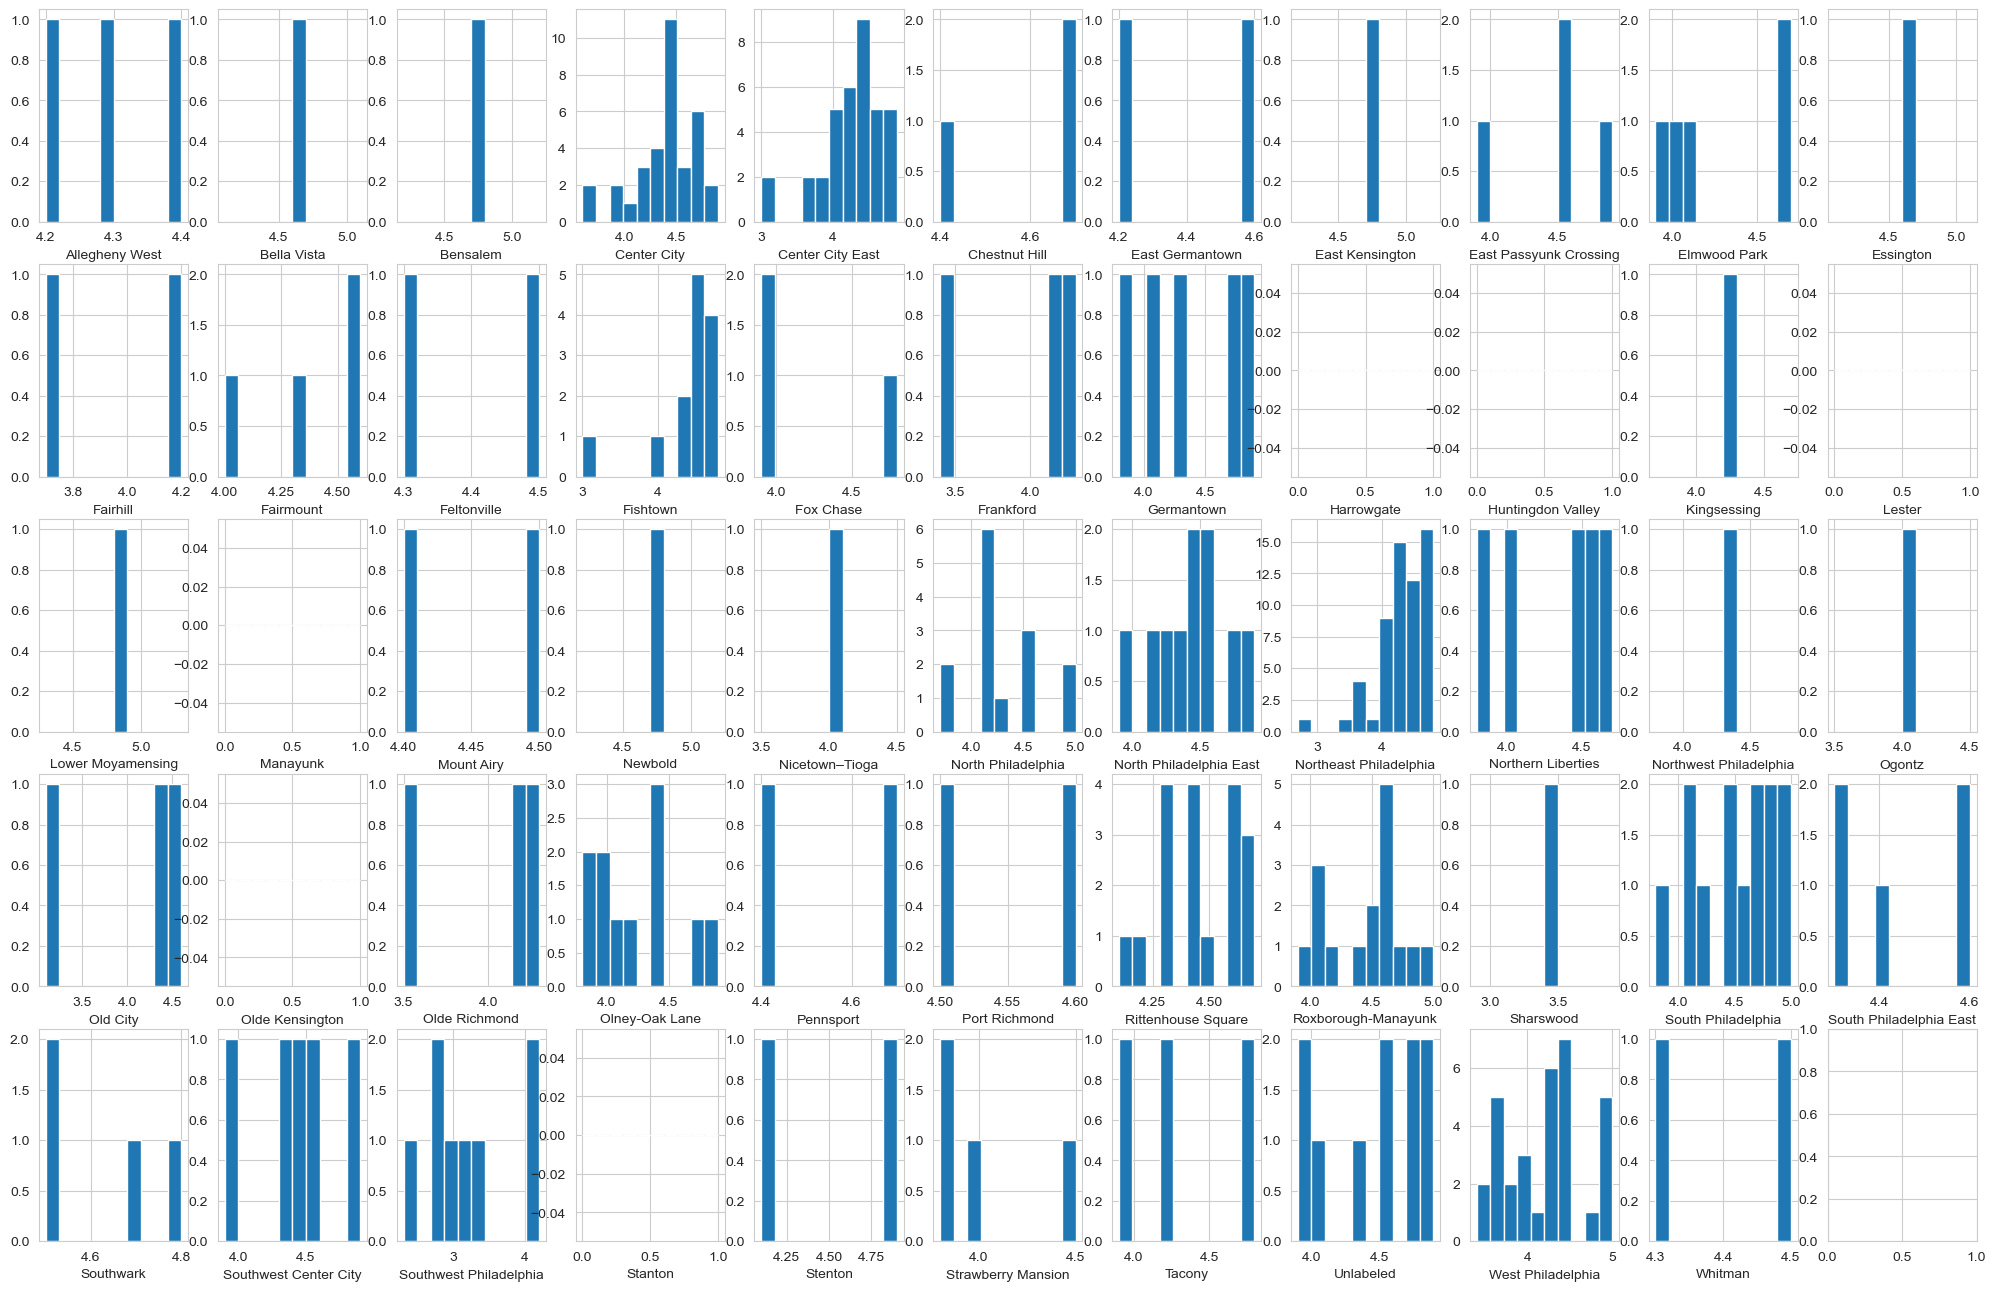

In [32]:
fig, ax = plt.subplots(5, 11, figsize = (25,16))

for i in range(54):
        marker = divmod(i,11)
        borough = boroughs[i]
        ax[marker].hist(restric_borough(rd_train, 'Restaurant', borough).rating)
        ax[marker].set_xlabel(borough)
plt.show()

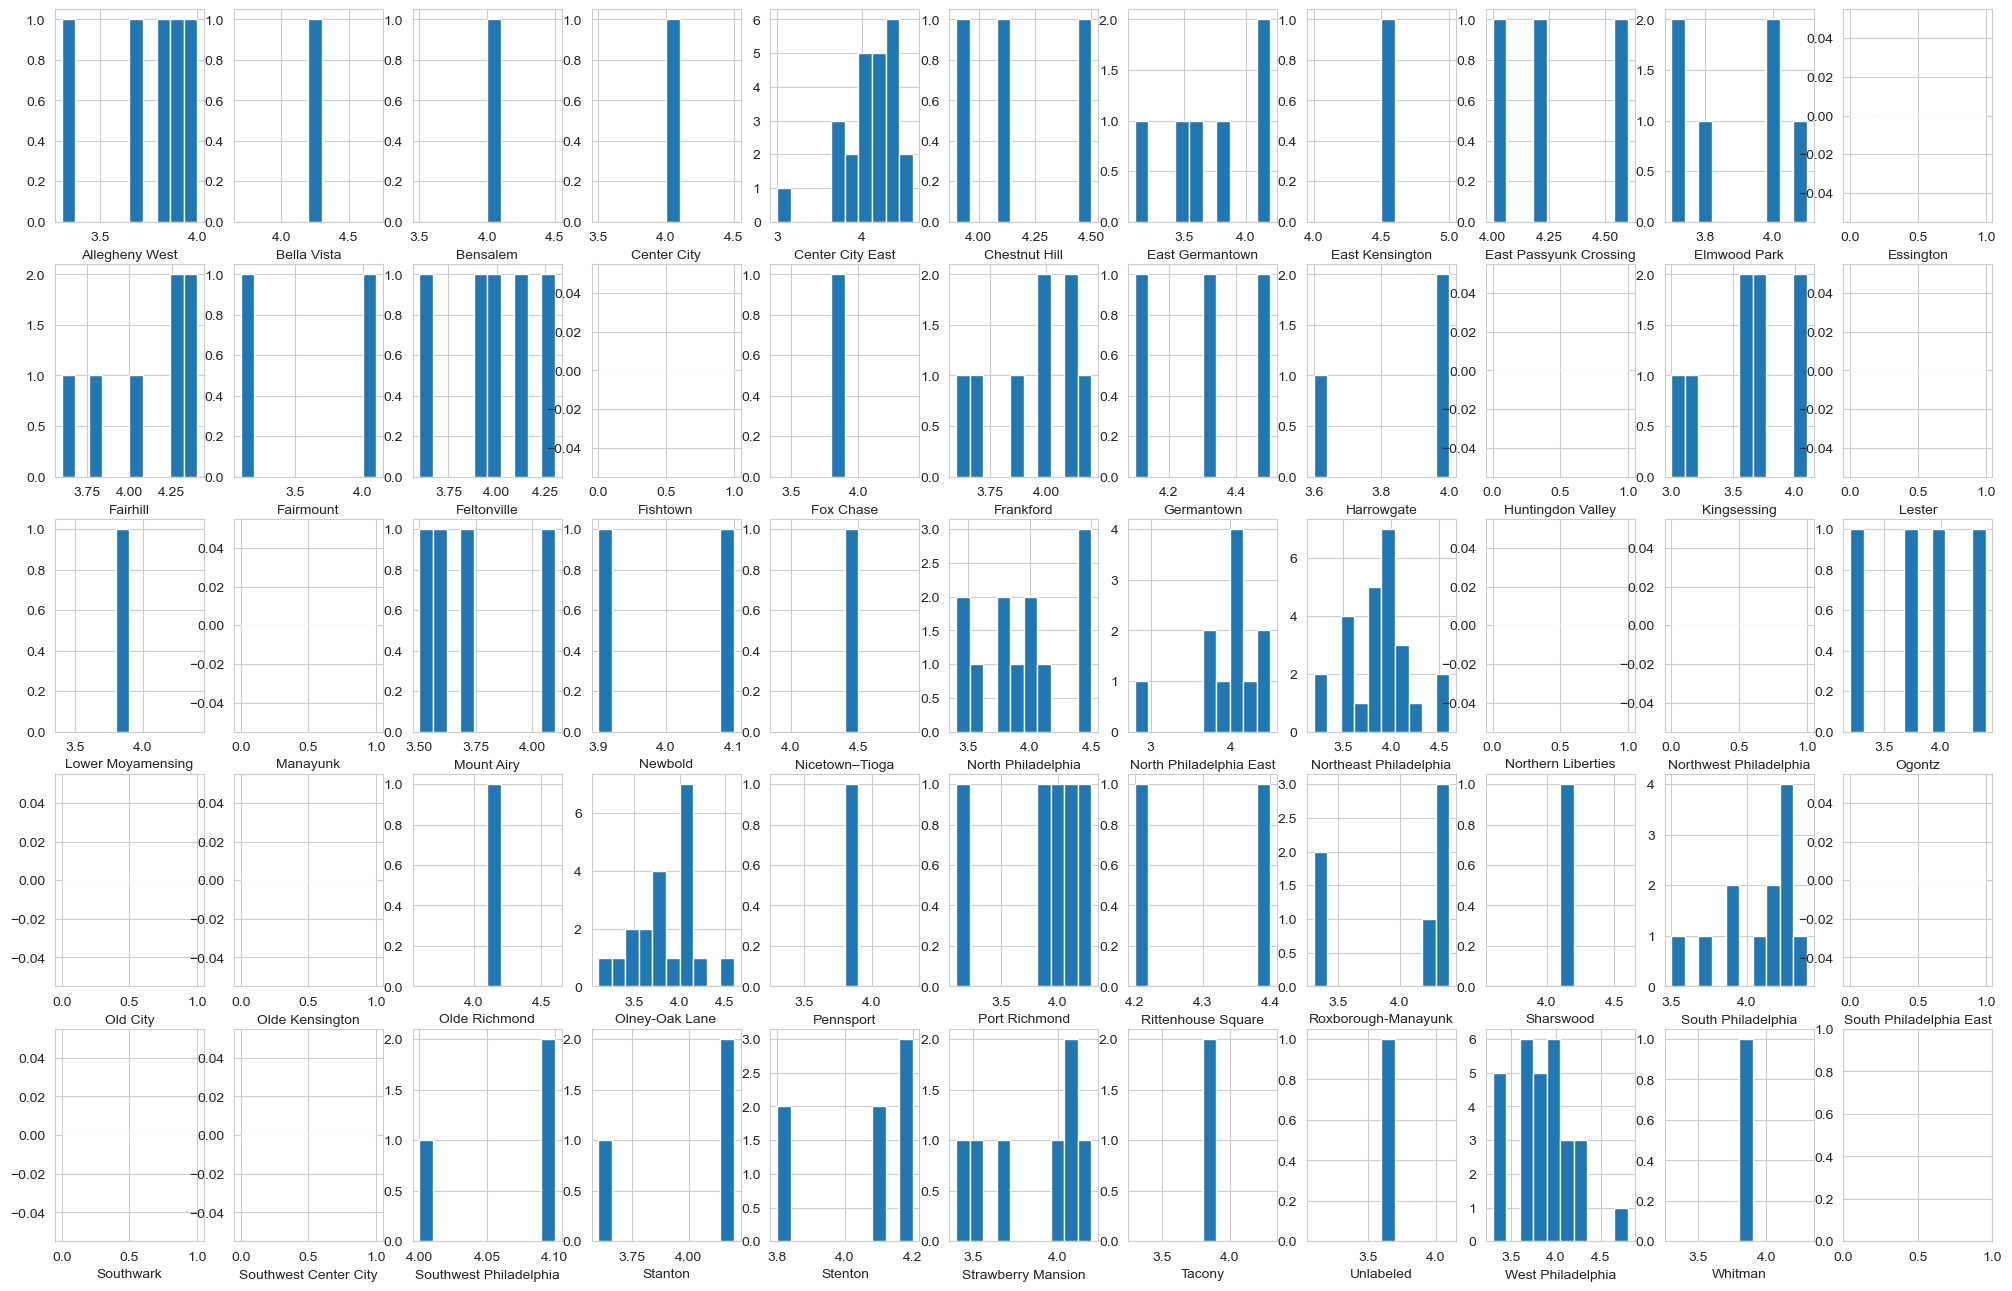

In [34]:
fig, ax = plt.subplots(5, 11, figsize = (25,16))

for i in range(54):
        marker = divmod(i,11)
        borough = boroughs[i]
        ax[marker].hist(restric_borough(rd_train, 'Chinese restaurant', borough).rating)
        ax[marker].set_xlabel(borough)
plt.show()

## Final Observations

We examine ratings distributions within each borough.

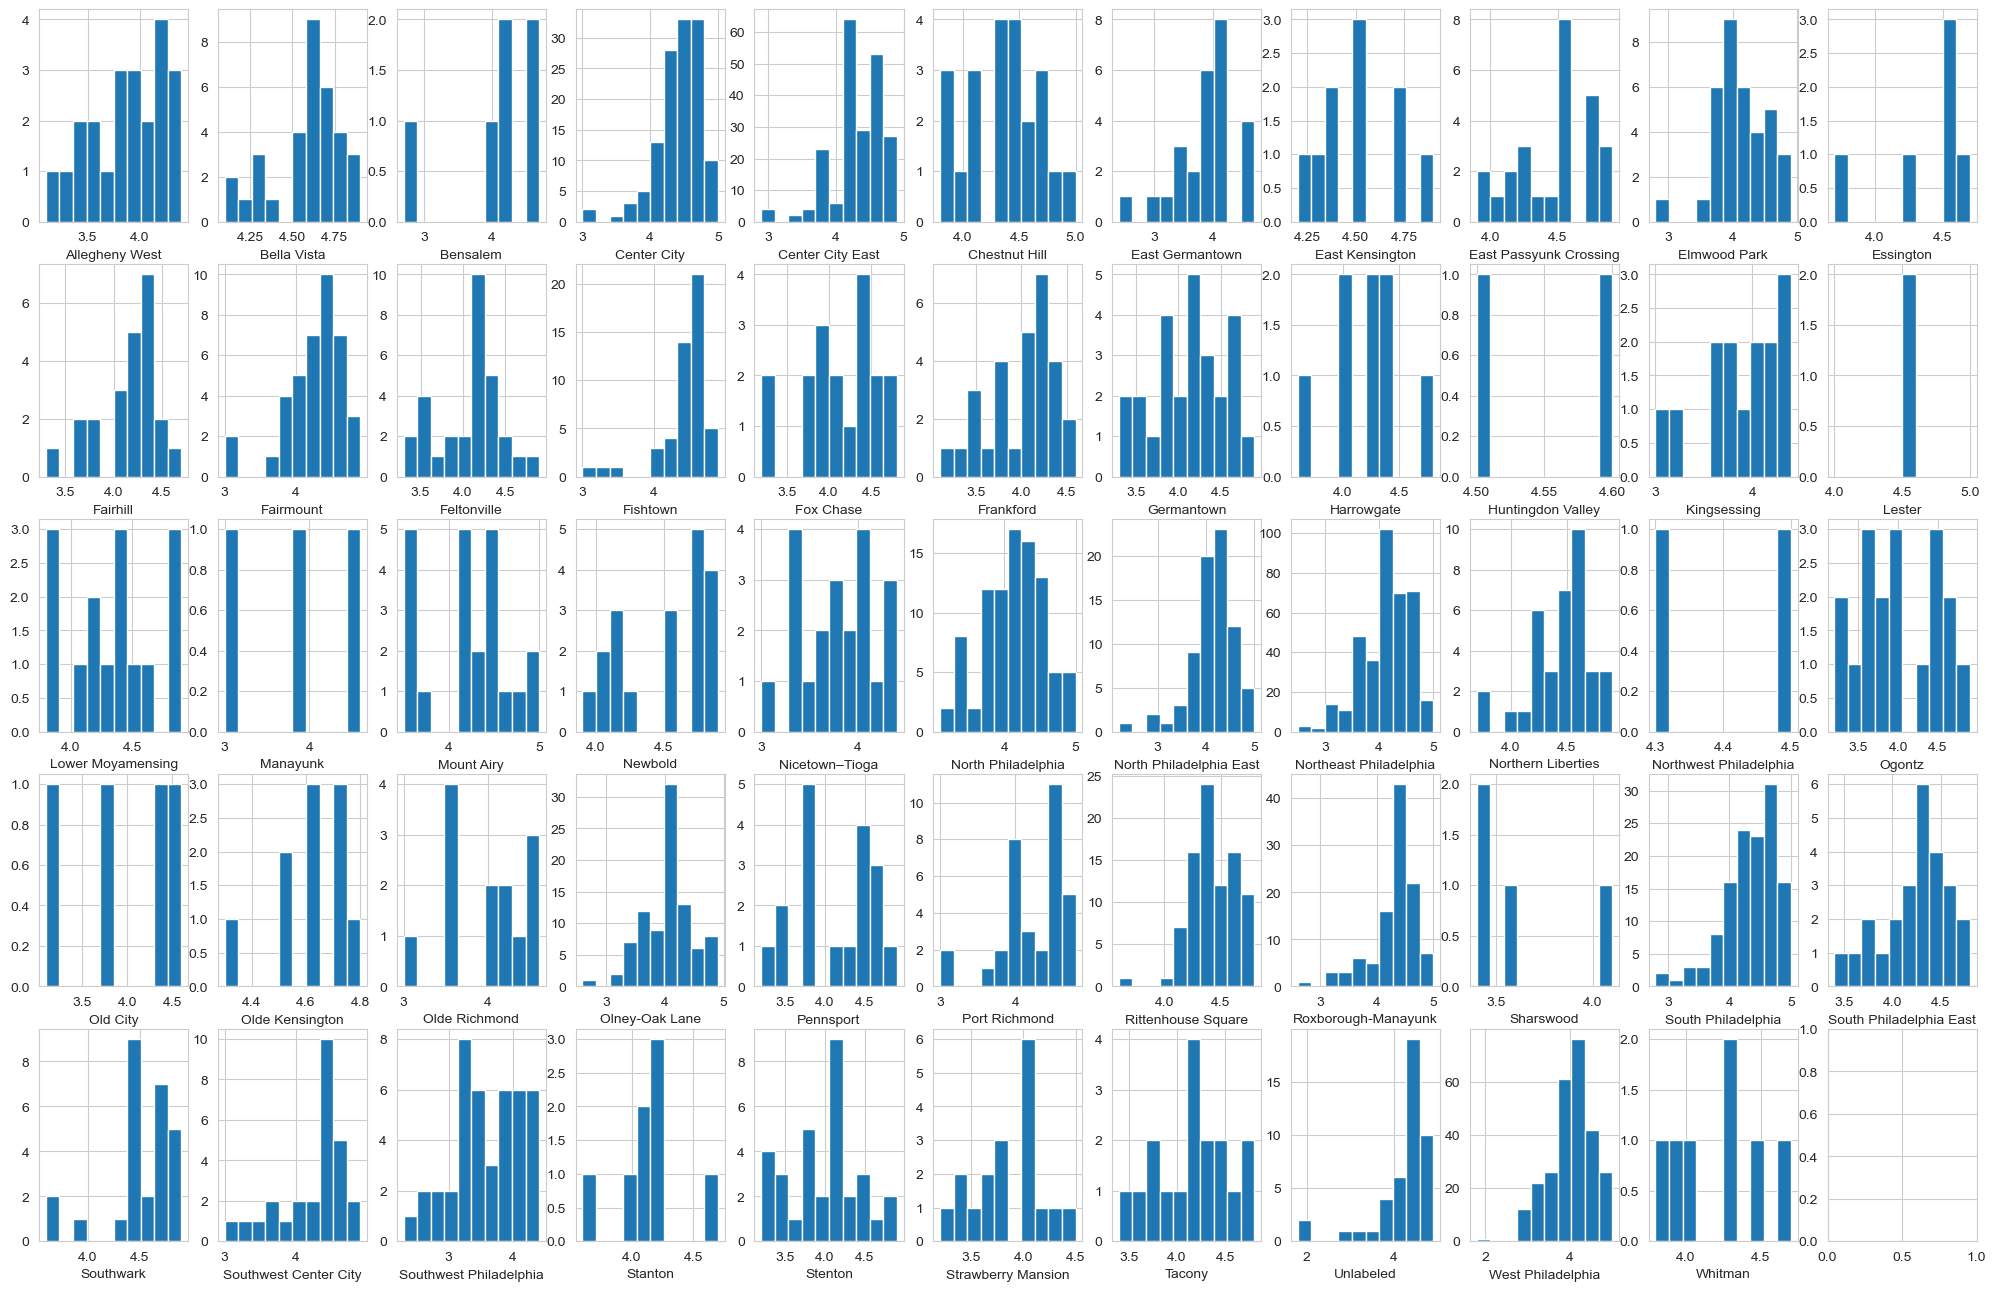

In [35]:
fig, ax = plt.subplots(5, 11, figsize = (25,16))

for i in range(54):
        marker = divmod(i,11)
        borough = boroughs[i]
        ax[marker].hist(rd_train[rd_train.borough == borough].rating)
        ax[marker].set_xlabel(borough)
plt.show()

In [36]:
boroughs_w_high_ratings = ['Bella Vista', 'Chestnut Hill', 'East Kensington', 'Easy Passyunk Crossing', 'Newbold', 'Olde Kensington']


The boroughs with high ratings thus have their ratings clustered near to one another. It seems likely that averaging within these boroughs or averaging locally, e.g. 'k-neighbors' regression, will be effective for those ratings.

Some more cuisine densities.. We consider adding this as another feature. 

In [37]:
rd_train[rd_train.borough == 'Bella Vista'].type.value_counts(normalize = True)

type
Italian restaurant       0.181818
Mexican restaurant       0.151515
Vietnamese restaurant    0.151515
Pizza restaurant         0.060606
Sandwich shop            0.060606
Seafood restaurant       0.030303
Sushi restaurant         0.030303
Filipino restaurant      0.030303
Diner                    0.030303
Cafe                     0.030303
Vegan restaurant         0.030303
Chinese restaurant       0.030303
Restaurant               0.030303
Deli                     0.030303
Malaysian restaurant     0.030303
Coffee shop              0.030303
Tex-Mex restaurant       0.030303
Bakery                   0.030303
Name: proportion, dtype: float64

In [38]:
rd_train[rd_train.borough == 'Center City East'].type.value_counts(normalize = True)

type
Restaurant              0.169811
Chinese restaurant      0.113208
American restaurant     0.047170
Pizza restaurant        0.047170
Italian restaurant      0.033019
                          ...   
Breakfast restaurant    0.004717
Cocktail bar            0.004717
Indian restaurant       0.004717
Chinese takeaway        0.004717
Grocery store           0.004717
Name: proportion, Length: 70, dtype: float64

In [33]:
features.append('reviews')
features

['type',
 'category',
 'site',
 'phone',
 'booking_appointment_link',
 'range',
 'latitude',
 'longitude',
 'postal_code',
 'borough',
 'working_hours_old_format',
 'other_hours',
 'range',
 'photos_count',
 'reviews_per_score_1',
 'reviews_per_score_2',
 'reviews']

In [39]:
#write the features, with 'reviews' included, to file
with open("../'Will It Restaurant?'/features.csv", 'w+') as file:
    for item in features:
        file.write(str(item) + "\n")